In [2]:
import torch
from PIL import Image
from utils import test_transform

c:\Users\yrasi\OneDrive\Документы\mlSandbox\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
model = torch.load('current-EfficientNetV2-S.pth').eval().to(device)

8.9


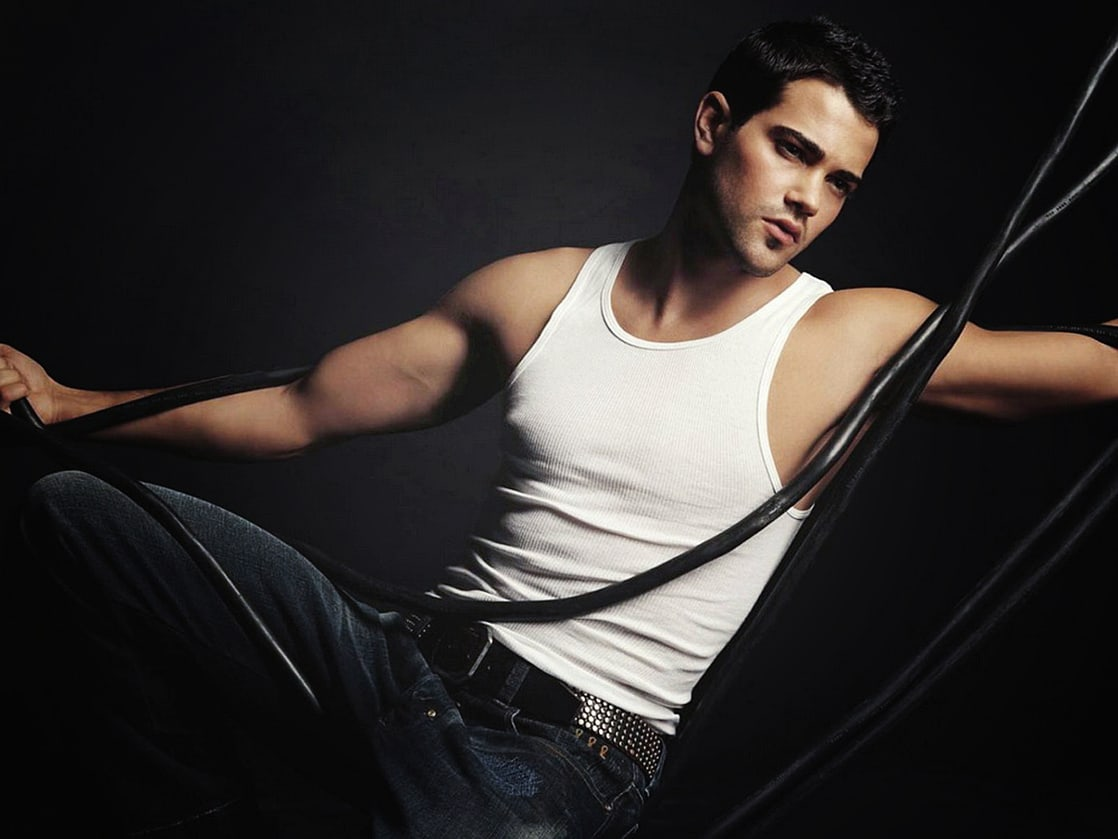

In [13]:
img = Image.open('9.jpg').convert('RGB')
input = test_transform(img).to(device)
input = input.reshape([1] + list(input.shape))

with torch.no_grad():
    result = model(input)

result = (result.flatten() * 10).round(decimals=1).clip(0, 10)
result = round(float(result.item()), 1)
print(result)
img